In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glider import Glider
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import CheckpointCallback
import pickle
from stable_baselines3.common.env_checker import check_env
from matplotlib.patches import Ellipse

/Users/iandavenport/Desktop/research/projects/gliding/venv/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
glider = Glider(v0=0.1, w0=0, theta0=0, u0=0)
for i in range(65):
    action = 0 * np.random.choice([0, 1, 2])
    glider.step(action)

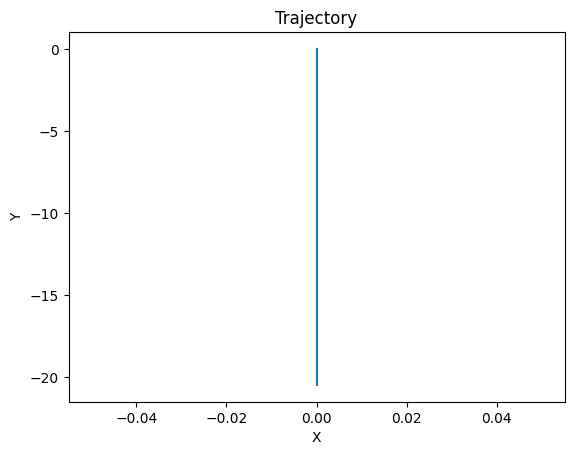

In [24]:
plt.plot(glider.x, glider.y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Trajectory")
plt.show()

In [ ]:
glider = Glider()
model = PPO.load("big_state_models/rl_model_400000_steps.zip", env=glider)
done = False
obs = glider.reset()
while not done:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, _ = glider.step(action.item())

In [ ]:
plt.plot(glider.theta)

In [ ]:
plt.scatter(glider.x, glider.y)

In [ ]:
beta = np.array(glider.beta)
mass = glider.a(beta) * glider.b(beta)
plt.plot(glider.t_hist, mass)

In [ ]:
np.min(mass), np.max(mass)